# Configuração

In [ ]:
!pip uninstall numpy
!pip install numpy

!pip install pmdarima

Uninstalling numpy-1.19.5:
  Would remove:
    /usr/bin/f2py
    /usr/local/bin/f2py
    /usr/local/bin/f2py3
    /usr/local/bin/f2py3.7
    /usr/local/lib/python3.7/dist-packages/numpy-1.19.5.dist-info/*
    /usr/local/lib/python3.7/dist-packages/numpy.libs/libgfortran-2e0d59d6.so.5.0.0
    /usr/local/lib/python3.7/dist-packages/numpy.libs/libopenblasp-r0-09e95953.3.13.so
    /usr/local/lib/python3.7/dist-packages/numpy.libs/libquadmath-2d0c479f.so.0.0.0
    /usr/local/lib/python3.7/dist-packages/numpy.libs/libz-eb09ad1d.so.1.2.3
    /usr/local/lib/python3.7/dist-packages/numpy/*
Proceed (y/n)? y
  Successfully uninstalled numpy-1.19.5
     |████████████████████████████████| 15.3MB 233kB/s 
ERROR: tensorflow 2.4.1 has requirement numpy~=1.19.2, but you'll have numpy 1.20.3 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have 

     |████████████████████████████████| 1.5MB 3.0MB/s 
     |████████████████████████████████| 9.5MB 19.3MB/s 
     |████████████████████████████████| 14.8MB 295kB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.20.3
    Uninstalling numpy-1.20.3:
      Successfully uninstalled numpy-1.20.3
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
#Import modules
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import math
from random import shuffle, choice
import datetime

import matplotlib

import scipy.stats as scistats

In [ ]:
!git clone https://github.com/eitiyamamoto/MO826-projeto.git

Cloning into 'MO826-projeto'...
remote: Enumerating objects: 94, done.
remote: Counting objects: 100% (94/94), done.
remote: Compressing objects: 100% (73/73), done.
remote: Total 94 (delta 29), reused 73 (delta 14), pack-reused 0
Unpacking objects: 100% (94/94), done.
Checking out files: 100% (46/46), done.


In [ ]:
%cd MO826-projeto
!ls

/content/MO826-projeto
CONTRIBUTING.rst  image        mo826_projeto	     setup.cfg
data		  LICENSE      README.md	     setup.py
docs		  Makefile     README.rst	     tests
HISTORY.rst	  MANIFEST.in  requirements_dev.txt  tox.ini


In [ ]:
!git pull origin master

From https://github.com/eitiyamamoto/MO826-projeto
 * branch            master     -> FETCH_HEAD
Already up to date.


# Leitura de dados e pré-processamento

In [ ]:
isolamento_sao_paulo_data = pd.read_csv('data/raw/20210407_isolamento_utf_8.csv', engine='python', sep=';')

In [ ]:
isolamento_sao_paulo_data.head(10)

,Município1,Código Município IBGE,População estimada (2020),UF1,Data,Média de Índice De Isolamento
0,AMERICANA,3501608,242018,SP,"terça-feira, 06/04",40%
1,AMERICANA,3501608,242018,SP,"segunda-feira, 05/04",40%
2,AMERICANA,3501608,242018,SP,"domingo, 04/04",49%
3,AMERICANA,3501608,242018,SP,"sábado, 03/04",44%
4,AMERICANA,3501608,242018,SP,"sexta-feira, 02/04",45%
5,AMERICANA,3501608,242018,SP,"quinta-feira, 01/04",38%
6,AMERICANA,3501608,242018,SP,"quarta-feira, 31/03",39%
7,AMERICANA,3501608,242018,SP,"terça-feira, 30/03",40%
8,AMERICANA,3501608,242018,SP,"segunda-feira, 29/03",41%
9,AMERICANA,3501608,242018,SP,"domingo, 28/03",47%


In [ ]:
isolamento_sao_paulo_data[['dia da semana', 'data']] = isolamento_sao_paulo_data.Data.str.split(", ", expand=True)
isolamento_sao_paulo_data[['dia', 'mes']] = isolamento_sao_paulo_data.data.str.split("/", expand=True)
isolamento_sao_paulo_data['dia'] = isolamento_sao_paulo_data['dia'].astype(int)
isolamento_sao_paulo_data['mes'] = isolamento_sao_paulo_data['mes'].astype(int)

cidade_atual = 0
dia_convertido = dict()
for i, row in isolamento_sao_paulo_data.iterrows():
  if cidade_atual == 0 or cidade_atual != row[2]:
    dia_convertido.clear()
    cidade_atual = row[2]
  if (row.mes < 4 or (row.mes == 4 and row.dia < 7)):
    if row.mes in dia_convertido:
      if row.dia in dia_convertido[row.mes] or (row.mes == 2 and row.dia == 29):
        isolamento_sao_paulo_data.at[i, 'data'] = datetime.datetime(2020, row.mes, row.dia)
      else:
        isolamento_sao_paulo_data.at[i, 'data'] = datetime.datetime(2021, row.mes, row.dia)
        dia_convertido[row.mes][row.dia] = True
    else:
      dia_convertido[row.mes] = dict()
      dia_convertido[row.mes][row.dia] = True
      isolamento_sao_paulo_data.at[i, 'data'] = datetime.datetime(2021, row.mes, row.dia)
  else:
    isolamento_sao_paulo_data.at[i, 'data'] = datetime.datetime(2020, row.mes, row.dia)

In [ ]:
isolamento_sao_paulo_data.head(10)

,Município1,Código Município IBGE,População estimada (2020),UF1,Data,Média de Índice De Isolamento,dia da semana,data,dia,mes
0,AMERICANA,3501608,242018,SP,"terça-feira, 06/04",40%,terça-feira,2021-04-06 00:00:00,6,4
1,AMERICANA,3501608,242018,SP,"segunda-feira, 05/04",40%,segunda-feira,2021-04-05 00:00:00,5,4
2,AMERICANA,3501608,242018,SP,"domingo, 04/04",49%,domingo,2021-04-04 00:00:00,4,4
3,AMERICANA,3501608,242018,SP,"sábado, 03/04",44%,sábado,2021-04-03 00:00:00,3,4
4,AMERICANA,3501608,242018,SP,"sexta-feira, 02/04",45%,sexta-feira,2021-04-02 00:00:00,2,4
5,AMERICANA,3501608,242018,SP,"quinta-feira, 01/04",38%,quinta-feira,2021-04-01 00:00:00,1,4
6,AMERICANA,3501608,242018,SP,"quarta-feira, 31/03",39%,quarta-feira,2021-03-31 00:00:00,31,3
7,AMERICANA,3501608,242018,SP,"terça-feira, 30/03",40%,terça-feira,2021-03-30 00:00:00,30,3
8,AMERICANA,3501608,242018,SP,"segunda-feira, 29/03",41%,segunda-feira,2021-03-29 00:00:00,29,3
9,AMERICANA,3501608,242018,SP,"domingo, 28/03",47%,domingo,2021-03-28 00:00:00,28,3


In [ ]:
covid_sao_paulo_data = pd.read_csv('data/raw/20210420_dados_covid_municipios_sp_utf_8.csv', engine='python', sep=';')

In [ ]:
covid_sao_paulo_data.head(10)

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,obitos_novos,obitos_pc,obitos_mm7d,letalidade,nome_ra,cod_ra,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem
0,Adamantina,3500105,25,2,25/02/2020,0,0,"0,00E+00",0,0,0,"0,00E+00",0,0,RA de Presidente Prudente,9,Marília,5,33894,7398,41199,0,8.0,"-21,682","-51,0737",9
1,Adolfo,3500204,25,2,25/02/2020,0,0,"0,00E+00",0,0,0,"0,00E+00",0,0,RA de São José do Rio Preto,14,São José do Rio Preto,15,3447,761,21106,0,8.0,"-21,2325","-49,6451",9
2,Aguaí,3500303,25,2,25/02/2020,0,0,"0,00E+00",0,0,0,"0,00E+00",0,0,RA de Campinas,4,São João da Boa Vista,14,35608,5245,47455,0,8.0,"-22,0572","-46,9735",9
3,Águas da Prata,3500402,25,2,25/02/2020,0,0,"0,00E+00",0,0,0,"0,00E+00",0,0,RA de Campinas,4,São João da Boa Vista,14,7797,1729,14267,0,8.0,"-21,9319","-46,7176",9
4,Águas de Lindóia,3500501,25,2,25/02/2020,0,0,"0,00E+00",0,0,0,"0,00E+00",0,0,RA de Campinas,4,Campinas,3,18374,3275,6013,0,8.0,"-22,4733","-46,6314",9
5,Águas de Santa Bárbara,3500550,25,2,25/02/2020,0,0,"0,00E+00",0,0,0,"0,00E+00",0,0,RA de Sorocaba,13,Bauru,12,5931,1106,40446,0,8.0,"-22,8812","-49,2421",9
6,Águas de São Pedro,3500600,25,2,25/02/2020,0,0,"0,00E+00",0,0,0,"0,00E+00",0,0,RA de Campinas,4,Piracicaba,11,3122,764,361,0,8.0,"-22,5977","-47,8734",9
7,Agudos,3500709,25,2,25/02/2020,0,0,"0,00E+00",0,0,0,"0,00E+00",0,0,RA de Bauru,3,Bauru,12,36134,5524,96671,0,8.0,"-22,4694","-48,9863",9
8,Alambari,3500758,25,2,25/02/2020,0,0,"0,00E+00",0,0,0,"0,00E+00",0,0,RA de Sorocaba,13,Sorocaba,6,5779,830,1596,0,8.0,"-23,5503","-47,898",9
9,Alfredo Marcondes,3500808,25,2,25/02/2020,0,0,"0,00E+00",0,0,0,"0,00E+00",0,0,RA de Presidente Prudente,9,Presidente Prudente,2,3927,907,11892,0,8.0,"-21,9527","-51,414",9


In [ ]:
covid_sao_paulo_data['datahora'] = covid_sao_paulo_data.loc[:,'datahora'].astype('datetime64[ns]')
isolamento_sao_paulo_data['data'] = isolamento_sao_paulo_data.loc[:,'data'].astype('datetime64[ns]')

In [ ]:
isolamento_sao_paulo_data.set_index('data')
covid_sao_paulo_data.set_index('datahora')

,nome_munic,codigo_ibge,dia,mes,casos,casos_novos,casos_pc,casos_mm7d,obitos,obitos_novos,obitos_pc,obitos_mm7d,letalidade,nome_ra,cod_ra,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem
datahora,,,,,,,,,,,,,,,,,,,,,,,,,
2020-02-25,Adamantina,3500105,25,2,0,0,"0,00E+00",0,0,0,"0,00E+00",0,0,RA de Presidente Prudente,9,Marília,5,33894,7398,41199,0,8.0,"-21,682","-51,0737",9
2020-02-25,Adolfo,3500204,25,2,0,0,"0,00E+00",0,0,0,"0,00E+00",0,0,RA de São José do Rio Preto,14,São José do Rio Preto,15,3447,761,21106,0,8.0,"-21,2325","-49,6451",9
2020-02-25,Aguaí,3500303,25,2,0,0,"0,00E+00",0,0,0,"0,00E+00",0,0,RA de Campinas,4,São João da Boa Vista,14,35608,5245,47455,0,8.0,"-22,0572","-46,9735",9
2020-02-25,Águas da Prata,3500402,25,2,0,0,"0,00E+00",0,0,0,"0,00E+00",0,0,RA de Campinas,4,São João da Boa Vista,14,7797,1729,14267,0,8.0,"-21,9319","-46,7176",9
2020-02-25,Águas de Lindóia,3500501,25,2,0,0,"0,00E+00",0,0,0,"0,00E+00",0,0,RA de Campinas,4,Campinas,3,18374,3275,6013,0,8.0,"-22,4733","-46,6314",9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-16,Ignorado,9999999,16,4,541,24,"0,00E+00","8,7142857",3,-3,"0,00E+00","-0,2857143","0,005545287",NaN,0,NaN,0,0,0,0,NaN,NaN,0,0,15
2021-04-17,Ignorado,9999999,17,4,590,49,"0,00E+00","7,1428571",1,-2,"0,00E+00","-0,5714286","0,001694915",NaN,0,NaN,0,0,0,0,NaN,NaN,0,0,15
2021-04-18,Ignorado,9999999,18,4,577,-13,"0,00E+00","10,2857143",1,0,"0,00E+00","-1,1428571","0,001733102",NaN,0,NaN,0,0,0,0,NaN,NaN,0,0,16


In [ ]:
merge_isolamento_covid_data = pd.merge(isolamento_sao_paulo_data, covid_sao_paulo_data, how='inner', left_on=['data', 'Código Município IBGE'], right_on=['datahora', 'codigo_ibge'])

In [ ]:
merge_isolamento_covid_data.head(10)

,Município1,Código Município IBGE,População estimada (2020),UF1,Data,Média de Índice De Isolamento,dia da semana,data,dia_x,mes_x,nome_munic,codigo_ibge,dia_y,mes_y,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,obitos_novos,obitos_pc,obitos_mm7d,letalidade,nome_ra,cod_ra,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem
0,AMERICANA,3501608,242018,SP,"domingo, 04/04",49%,domingo,2021-04-04,4,4,Americana,3501608,4,4,2021-04-04,13468,23,"5,77E+03","57,8571429",366,0,"1,57E+02","3,5714286","0,027175527",RA de Campinas,4,Campinas,3,233458,40276,13391,>5000,1.0,"-22,7374","-47,3331",14
1,AMERICANA,3501608,242018,SP,"sábado, 03/04",44%,sábado,2021-04-03,3,4,Americana,3501608,4,3,2021-04-03,11083,46,"4,75E+03","39,4285714",287,0,"1,23E+02","1,1428571","0,025895516",RA de Campinas,4,Campinas,3,233458,40276,13391,>5000,1.0,"-22,7374","-47,3331",9
2,AMERICANA,3501608,242018,SP,"sexta-feira, 02/04",45%,sexta-feira,2021-04-02,2,4,Americana,3501608,4,2,2021-04-02,9625,16,"4,12E+03",26,248,0,"1,06E+02","0,2857143","0,025766234",RA de Campinas,4,Campinas,3,233458,40276,13391,>5000,1.0,"-22,7374","-47,3331",5
3,AMERICANA,3501608,242018,SP,"quinta-feira, 01/04",38%,quinta-feira,2021-04-01,1,4,Americana,3501608,4,1,2021-04-01,8078,3,"3,46E+03","60,2857143",212,0,"9,08E+01","1,4285714","0,02624412",RA de Campinas,4,Campinas,3,233458,40276,13391,>5000,1.0,"-22,7374","-47,3331",1
4,AMERICANA,3501608,242018,SP,"quarta-feira, 31/03",39%,quarta-feira,2021-03-31,31,3,Americana,3501608,31,3,2021-03-31,13260,94,"5,68E+03","85,8571429",350,3,"1,50E+02","3,8571429","0,026395174",RA de Campinas,4,Campinas,3,233458,40276,13391,>5000,1.0,"-22,7374","-47,3331",13
5,AMERICANA,3501608,242018,SP,"terça-feira, 30/03",40%,terça-feira,2021-03-30,30,3,Americana,3501608,30,3,2021-03-30,13166,72,"5,64E+03","89,1428571",347,6,"1,49E+02","3,4285714","0,026355765",RA de Campinas,4,Campinas,3,233458,40276,13391,>5000,1.0,"-22,7374","-47,3331",13
6,AMERICANA,3501608,242018,SP,"segunda-feira, 29/03",41%,segunda-feira,2021-03-29,29,3,Americana,3501608,29,3,2021-03-29,13094,31,"5,61E+03","99,5714286",341,0,"1,46E+02",3,"0,026042462",RA de Campinas,4,Campinas,3,233458,40276,13391,>5000,1.0,"-22,7374","-47,3331",13
7,AMERICANA,3501608,242018,SP,"domingo, 28/03",47%,domingo,2021-03-28,28,3,Americana,3501608,28,3,2021-03-28,13063,59,"5,60E+03",99,341,0,"1,46E+02",3,"0,026104264",RA de Campinas,4,Campinas,3,233458,40276,13391,>5000,1.0,"-22,7374","-47,3331",13
8,AMERICANA,3501608,242018,SP,"sábado, 27/03",44%,sábado,2021-03-27,27,3,Americana,3501608,27,3,2021-03-27,13004,83,"5,57E+03","105,2857143",341,6,"1,46E+02",3,"0,026222701",RA de Campinas,4,Campinas,3,233458,40276,13391,>5000,1.0,"-22,7374","-47,3331",12
9,AMERICANA,3501608,242018,SP,"sexta-feira, 26/03",39%,sexta-feira,2021-03-26,26,3,Americana,3501608,26,3,2021-03-26,12921,200,"5,53E+03","112,2857143",335,12,"1,43E+02",3,"0,025926786",RA de Campinas,4,Campinas,3,233458,40276,13391,>5000,1.0,"-22,7374","-47,3331",12


In [ ]:
merge_isolamento_covid_data['Média de Índice De Isolamento'] = merge_isolamento_covid_data['Média de Índice De Isolamento'].str.rstrip('%').astype('int')

In [ ]:
merge_isolamento_covid_data

,Município1,Código Município IBGE,População estimada (2020),UF1,Data,Média de Índice De Isolamento,dia da semana,data,dia_x,mes_x,nome_munic,codigo_ibge,dia_y,mes_y,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,obitos_novos,obitos_pc,obitos_mm7d,letalidade,nome_ra,cod_ra,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem
0,AMERICANA,3501608,242018,SP,"domingo, 04/04",49,domingo,2021-04-04,4,4,Americana,3501608,4,4,2021-04-04,13468,23,"5,77E+03","57,8571429",366,0,"1,57E+02","3,5714286","0,027175527",RA de Campinas,4,Campinas,3,233458,40276,13391,>5000,1.0,"-22,7374","-47,3331",14
1,AMERICANA,3501608,242018,SP,"sábado, 03/04",44,sábado,2021-04-03,3,4,Americana,3501608,4,3,2021-04-03,11083,46,"4,75E+03","39,4285714",287,0,"1,23E+02","1,1428571","0,025895516",RA de Campinas,4,Campinas,3,233458,40276,13391,>5000,1.0,"-22,7374","-47,3331",9
2,AMERICANA,3501608,242018,SP,"sexta-feira, 02/04",45,sexta-feira,2021-04-02,2,4,Americana,3501608,4,2,2021-04-02,9625,16,"4,12E+03",26,248,0,"1,06E+02","0,2857143","0,025766234",RA de Campinas,4,Campinas,3,233458,40276,13391,>5000,1.0,"-22,7374","-47,3331",5
3,AMERICANA,3501608,242018,SP,"quinta-feira, 01/04",38,quinta-feira,2021-04-01,1,4,Americana,3501608,4,1,2021-04-01,8078,3,"3,46E+03","60,2857143",212,0,"9,08E+01","1,4285714","0,02624412",RA de Campinas,4,Campinas,3,233458,40276,13391,>5000,1.0,"-22,7374","-47,3331",1
4,AMERICANA,3501608,242018,SP,"quarta-feira, 31/03",39,quarta-feira,2021-03-31,31,3,Americana,3501608,31,3,2021-03-31,13260,94,"5,68E+03","85,8571429",350,3,"1,50E+02","3,8571429","0,026395174",RA de Campinas,4,Campinas,3,233458,40276,13391,>5000,1.0,"-22,7374","-47,3331",13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49325,VOTUPORANGA,3557105,95338,SP,"terça-feira, 03/03",40,terça-feira,2020-03-03,3,3,Votuporanga,3557105,3,3,2020-03-03,0,0,"0,00E+00",0,0,0,"0,00E+00",0,0,RA de São José do Rio Preto,14,São José do Rio Preto,15,91760,17203,4207,0,8.0,"-20,4237","-49,9781",10
49326,VOTUPORANGA,3557105,95338,SP,"sábado, 29/02",37,sábado,2020-02-29,29,2,Votuporanga,3557105,29,2,2020-02-29,0,0,"0,00E+00",0,0,0,"0,00E+00",0,0,RA de São José do Rio Preto,14,São José do Rio Preto,15,91760,17203,4207,0,8.0,"-20,4237","-49,9781",9
49327,VOTUPORANGA,3557105,95338,SP,"sexta-feira, 28/02",37,sexta-feira,2020-02-28,28,2,Votuporanga,3557105,28,2,2020-02-28,0,0,"0,00E+00",0,0,0,"0,00E+00",0,0,RA de São José do Rio Preto,14,São José do Rio Preto,15,91760,17203,4207,0,8.0,"-20,4237","-49,9781",9
49328,VOTUPORANGA,3557105,95338,SP,"quinta-feira, 27/02",37,quinta-feira,2020-02-27,27,2,Votuporanga,3557105,27,2,2020-02-27,0,0,"0,00E+00",0,0,0,"0,00E+00",0,0,RA de São José do Rio Preto,14,São José do Rio Preto,15,91760,17203,4207,0,8.0,"-20,4237","-49,9781",9


# Correlação de Pearson

## Média de isolamento

Para estudar a correlação entre os dados de isolamento de são paulo com os índices da covid, iniciaremos com o método mais simples que é a correlação de Pearson.

Analisamos a correlação entre a média do índice de isolamento em um dia com os casos de óbitos novos e casos novos desse mesmo dia. Os valores deram uma correlação negativa e baixa. O p-valor é baixo, então o resultado é confiável

In [ ]:
r, p = scistats.pearsonr(merge_isolamento_covid_data.dropna()['Média de Índice De Isolamento'], merge_isolamento_covid_data.dropna()['obitos_novos'])
print(f"Pearson r: {r} and p-value: {p}")

Pearson r: -0.03831349022395001 and p-value: 1.7026249505131105e-17


In [ ]:
r, p = scistats.pearsonr(merge_isolamento_covid_data.dropna()['Média de Índice De Isolamento'], merge_isolamento_covid_data.dropna()['casos_novos'])
print(f"Pearson r: {r} and p-value: {p}")

Pearson r: -0.06146158532072596 and p-value: 1.6793201909689825e-42


Agora vamos calcular a correlação de pearson para os dados de isolamento para os dias anteriores. Para calcular esses dados, vamos deslocar os dias e adicionar em uma nova coluna. Esta operação é repetida 15 vezes

In [ ]:
isolamento_filtered = isolamento_sao_paulo_data[['Código Município IBGE', 'data', 'Média de Índice De Isolamento']]
isolamento_filtered['Média de Índice De Isolamento'] = isolamento_filtered['Média de Índice De Isolamento'].str.rstrip('%').astype('int')

isolamento_filtered_indexed = isolamento_filtered.set_index(['Código Município IBGE', 'data'])

covid_sao_paulo_data_lagged = pd.merge(covid_sao_paulo_data, isolamento_filtered_indexed, how='inner', left_on=['datahora', 'codigo_ibge'], right_on=['data', 'Código Município IBGE'], suffixes=["", "_1"])
covid_sao_paulo_data_lagged = covid_sao_paulo_data_lagged.rename(columns={'Média de Índice De Isolamento': 'isolamento_0'})

for i in range(1,31):
  isolamento_filtered_shift = isolamento_filtered_indexed.shift(-1 * i)
  isolamento_filtered_shift = isolamento_filtered_shift.rename(columns={'Média de Índice De Isolamento': 'isolamento_' + str(i)})
  covid_sao_paulo_data_lagged = pd.merge(covid_sao_paulo_data_lagged, isolamento_filtered_shift, how='inner', left_on=['datahora', 'codigo_ibge'], right_on=['data', 'Código Município IBGE'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
covid_sao_paulo_data_lagged.to_csv('isolamento_lagged.csv', sep=';', decimal=',')

Ao comparar as datas anteriores com os óbitos, observamos que a maior correlação está com o nível de isolamento do dia anterior e de 8 dias antes. O p-valor é baixo na maioria dos casos, com exceção dos dias 3 e 10.

In [ ]:
r_series = list()
p_series = list()
for i in range(31):
  r, p = scistats.pearsonr(covid_sao_paulo_data_lagged.dropna()['isolamento_' + str(i)], covid_sao_paulo_data_lagged.dropna()['obitos_novos'])
  r_series.append(r)
  p_series.append(p)
  print(f"For lagged {i} days Pearson r: {r} and p-value: {p}")

For lagged 0 days Pearson r: -0.03829332035186668 and p-value: 1.807004612393304e-17
For lagged 1 days Pearson r: -0.04044509265165006 and p-value: 2.6133970916432193e-19
For lagged 2 days Pearson r: -0.011769938645843154 and p-value: 0.008963903446194282
For lagged 3 days Pearson r: -0.006298445910694012 and p-value: 0.16196635676332102
For lagged 4 days Pearson r: -0.013492879665393363 and p-value: 0.0027352252441784322
For lagged 5 days Pearson r: -0.015348302227978628 and p-value: 0.0006542660651678115
For lagged 6 days Pearson r: -0.014734327512710331 and p-value: 0.0010689817296875767
For lagged 7 days Pearson r: -0.02841869033680182 and p-value: 2.768517523280003e-10
For lagged 8 days Pearson r: -0.030582722660011497 and p-value: 1.1057377603310036e-11
For lagged 9 days Pearson r: -0.007040805827068087 and p-value: 0.11797639587520949
For lagged 10 days Pearson r: 0.0013022197300203596 and p-value: 0.7724755000340151
For lagged 11 days Pearson r: -0.010841657001100223 and p-valu

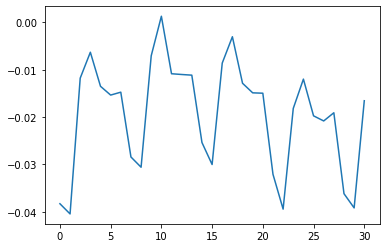

In [ ]:
plt.plot(r_series)
plt.show()

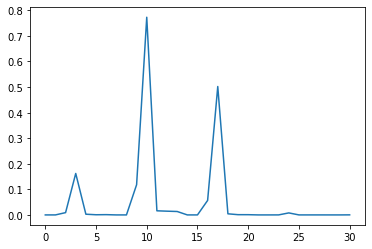

In [ ]:
plt.plot(p_series)
plt.show()

Repetimos a operação para os casos novos e a maior correlação está no dia anterior e 8 dias antes. O p-valor se mantem baixo para todos os valores.

In [ ]:
r_series = list()
p_series = list()
for i in range(31):
  r, p = scistats.pearsonr(covid_sao_paulo_data_lagged.dropna()['isolamento_' + str(i)], covid_sao_paulo_data_lagged.dropna()['casos_novos'])
  r_series.append(r)
  p_series.append(p)
  print(f"For lagged {i} days Pearson r: {r} and p-value: {p}")

For lagged 0 days Pearson r: -0.061438129694780325 and p-value: 1.9028654051015518e-42
For lagged 1 days Pearson r: -0.0682612727629104 and p-value: 5.250419663919217e-52
For lagged 2 days Pearson r: -0.04598086981451651 and p-value: 1.7029897295688704e-24
For lagged 3 days Pearson r: -0.03682774827193262 and p-value: 2.8426745929962946e-16
For lagged 4 days Pearson r: -0.04023480304104815 and p-value: 3.993381974114377e-19
For lagged 5 days Pearson r: -0.04033205376280259 and p-value: 3.2832375181187943e-19
For lagged 6 days Pearson r: -0.04062642129356549 and p-value: 1.8099802482727972e-19
For lagged 7 days Pearson r: -0.05335888873364167 and p-value: 2.0036154948014216e-32
For lagged 8 days Pearson r: -0.05821529407573568 and p-value: 2.7901433493336786e-38
For lagged 9 days Pearson r: -0.0404890392710698 and p-value: 2.3911438723660737e-19
For lagged 10 days Pearson r: -0.029004641789158604 and p-value: 1.1837797834818024e-10
For lagged 11 days Pearson r: -0.03393781377402405 and 

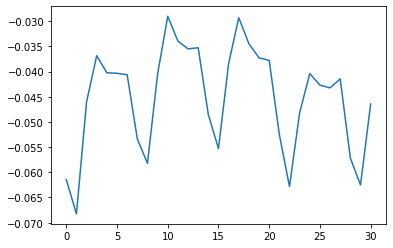

In [ ]:
plt.plot(r_series)
plt.show()

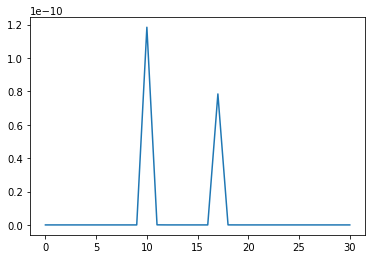

In [ ]:
plt.plot(p_series)
plt.show()

Analisando a correlação entre óbitos, casos novos e a média de isolamento divulgado pelo estado de são paulo mostram uma correlação baixa. O isolamento do dia 1 e 8 são os que apresentam maior correlação.

## Google Mobility

## Leitura e processamento dos dados

In [ ]:
# Read mobility data
mobility_data_2020 = pd.read_csv("data/raw/2020_BR_Region_Mobility_Report.csv")
mobility_data_2021 = pd.read_csv("data/raw/2021_BR_Region_Mobility_Report.csv")
mobility_data = pd.concat([mobility_data_2020, mobility_data_2021])

# Filter for São Paulo state
mobility_sao_paulo_data = mobility_data.loc[mobility_data['sub_region_1'] == 'State of São Paulo']
mobility_sao_paulo_data = mobility_sao_paulo_data.dropna(subset=['sub_region_2'])

# Read data from ibge to convert city name to ibge code (faster and light)
ibge_code_data = pd.read_csv('data/raw/RELATORIO_DTB_BRASIL_MUNICIPIO.csv', engine='python', sep=',')

# Filter for São Paulo state for optimization and remove the need to compare city and state
ibge_code_sao_paulo_data = ibge_code_data.loc[ibge_code_data['Nome_UF'] == 'São Paulo']

# Merge mobility data and ibge data
mobility_sao_paulo_ibge_data = pd.merge(left=mobility_sao_paulo_data, right=ibge_code_sao_paulo_data, how='inner', left_on='sub_region_2', right_on='Nome_Município')

# Read covid-19 data from São Paulo state
covid_sao_paulo_data = pd.read_csv('data/raw/20210420_dados_covid_municipios_sp_utf_8.csv', engine='python', sep=';')

# Set date to datetime
mobility_sao_paulo_ibge_data['date'] = mobility_sao_paulo_ibge_data.loc[:,'date'].astype('datetime64[ns]')
covid_sao_paulo_data['datahora'] = covid_sao_paulo_data.loc[:,'datahora'].astype('datetime64[ns]')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
mobility_sao_paulo_ibge_data.to_csv('mobility_sao_paulo.csv')

## Retail

In [ ]:
# Get columns that will be used to merge and the mobility to retail data
mobility_retail = mobility_sao_paulo_ibge_data[['Código Município Completo', 'date', 'retail_and_recreation_percent_change_from_baseline']]
mobility_retail_index = mobility_retail.set_index(['Código Município Completo', 'date'])

# Merge covid-19 data and retail data using shifting to compare with previous dates
covid_retail_data = pd.merge(covid_sao_paulo_data, mobility_retail_index, how='inner', left_on=['datahora', 'codigo_ibge'], right_on=['date', 'Código Município Completo'])
covid_retail_data = covid_retail_data.rename(columns={'retail_and_recreation_percent_change_from_baseline': 'retail_0'})
for i in range(1,30):
  mobility_retail_shift = mobility_retail_index.shift(-1 * i)
  mobility_retail_shift = mobility_retail_shift.rename(columns={'retail_and_recreation_percent_change_from_baseline': 'retail_' + str(i)})
  covid_retail_data = pd.merge(covid_retail_data, mobility_retail_shift, how='inner', left_on=['datahora', 'codigo_ibge'], right_on=['date', 'Código Município Completo'])

In [ ]:
# Get r data and p data for different dates
r_series = list()
p_series = list()
for i in range(15):
  r, p = scistats.pearsonr(covid_retail_data.dropna()['retail_' + str(i)], covid_retail_data.dropna()['obitos_novos'])
  r_series.append(r)
  p_series.append(p)
  print(f"For lagged {i} days Pearson r: {r} and p-value: {p}")

For lagged 0 days Pearson r: -0.04935712023294154 and p-value: 8.756095231023957e-30
For lagged 1 days Pearson r: -0.05304858772677216 and p-value: 3.76345376563879e-34
For lagged 2 days Pearson r: -0.057032052755817644 and p-value: 3.2583590071675616e-39
For lagged 3 days Pearson r: -0.060302751404739834 and p-value: 1.212701304176117e-43
For lagged 4 days Pearson r: -0.05690443249436639 and p-value: 4.7955684769559706e-39
For lagged 5 days Pearson r: -0.051330162709894656 and p-value: 4.4378845668503285e-32
For lagged 6 days Pearson r: -0.04384797874199532 and p-value: 7.579609681953663e-24
For lagged 7 days Pearson r: -0.042952480168830715 and p-value: 6.015968933236799e-23
For lagged 8 days Pearson r: -0.04954803028509307 and p-value: 5.298199327992714e-30
For lagged 9 days Pearson r: -0.0464521977220454 and p-value: 1.4434447152152793e-26
For lagged 10 days Pearson r: -0.04981050879596101 and p-value: 2.6472349159017648e-30
For lagged 11 days Pearson r: -0.04683257088595964 and p-

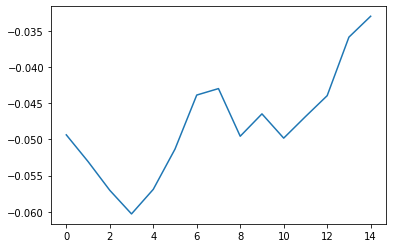

In [ ]:
plt.plot(r_series)
plt.show()

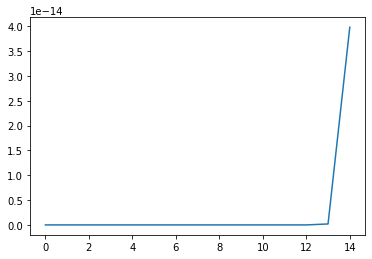

In [ ]:
plt.plot(p_series)
plt.show()

In [ ]:
# Get r data and p data for different dates
r_series = list()
p_series = list()
for i in range(15):
  r, p = scistats.pearsonr(covid_retail_data.dropna()['retail_' + str(i)], covid_retail_data.dropna()['casos_novos'])
  r_series.append(r)
  p_series.append(p)
  print(f"For lagged {i} days Pearson r: {r} and p-value: {p}")

For lagged 0 days Pearson r: -0.03292948384485038 and p-value: 4.02753519885466e-14
For lagged 1 days Pearson r: -0.03924378445455856 and p-value: 2.0456672031377644e-19
For lagged 2 days Pearson r: -0.045044606145076244 and p-value: 4.455753740278738e-25
For lagged 3 days Pearson r: -0.04652451117368498 and p-value: 1.2068577180414456e-26
For lagged 4 days Pearson r: -0.04157828357222504 and p-value: 1.3315526336856018e-21
For lagged 5 days Pearson r: -0.035396303378138864 and p-value: 4.4081364591604515e-16
For lagged 6 days Pearson r: -0.029102492290298425 and p-value: 2.3717662539256323e-11
For lagged 7 days Pearson r: -0.030678693349858253 and p-value: 1.880053464066736e-12
For lagged 8 days Pearson r: -0.04026293049828732 and p-value: 2.352623245314168e-20
For lagged 9 days Pearson r: -0.03865198223507808 and p-value: 7.005342828276023e-19
For lagged 10 days Pearson r: -0.03992162747945474 and p-value: 4.8835918953526855e-20
For lagged 11 days Pearson r: -0.034111973290879005 and

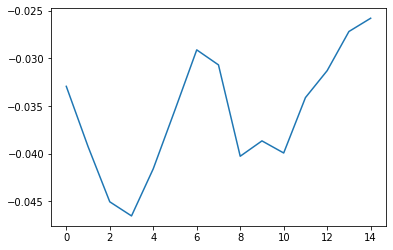

In [ ]:
plt.plot(r_series)
plt.show()

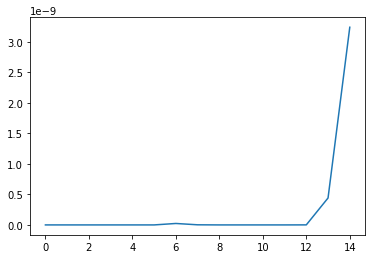

In [ ]:
plt.plot(p_series)
plt.show()

## Grocery and Pharmacy

In [ ]:
# Get columns that will be used to merge and the mobility to grocery and pharmacy data
mobility_pharmacy = mobility_sao_paulo_ibge_data[['Código Município Completo', 'date', 'grocery_and_pharmacy_percent_change_from_baseline']]
mobility_pharmacy_index = mobility_pharmacy.set_index(['Código Município Completo', 'date'])

# Merge covid-19 data and retail data using shifting to compare with previous dates
covid_pharmacy_data = pd.merge(covid_sao_paulo_data, mobility_pharmacy_index, how='inner', left_on=['datahora', 'codigo_ibge'], right_on=['date', 'Código Município Completo'])
covid_pharmacy_data = covid_pharmacy_data.rename(columns={'grocery_and_pharmacy_percent_change_from_baseline': 'date_0'})
for i in range(1,30):
  mobility_pharmacy_shift = mobility_pharmacy_index.shift(-1 * i)
  mobility_pharmacy_shift = mobility_pharmacy_shift.rename(columns={'grocery_and_pharmacy_percent_change_from_baseline': 'date_' + str(i)})
  covid_pharmacy_data = pd.merge(covid_pharmacy_data, mobility_pharmacy_shift, how='inner', left_on=['datahora', 'codigo_ibge'], right_on=['date', 'Código Município Completo'])

In [ ]:
# Get r data and p data for different dates
r_series = list()
p_series = list()
for i in range(15):
  r, p = scistats.pearsonr(covid_pharmacy_data.dropna()['date_' + str(i)], covid_pharmacy_data.dropna()['obitos_novos'])
  r_series.append(r)
  p_series.append(p)
  print(f"For lagged {i} days Pearson r: {r} and p-value: {p}")

For lagged 0 days Pearson r: 0.0014487374908485253 and p-value: 0.738302992069263
For lagged 1 days Pearson r: 0.0029791334938971265 and p-value: 0.4920601514569898
For lagged 2 days Pearson r: -0.0026167075377298912 and p-value: 0.5462065085720939
For lagged 3 days Pearson r: -0.00994972999060138 and p-value: 0.021754993796363135
For lagged 4 days Pearson r: -0.00935392963474861 and p-value: 0.030989448296695837
For lagged 5 days Pearson r: -0.008685228101167144 and p-value: 0.045178809600033724
For lagged 6 days Pearson r: -0.0040354222263521075 and p-value: 0.35204259685343625
For lagged 7 days Pearson r: 0.00372899000638849 and p-value: 0.3898078879437125
For lagged 8 days Pearson r: -0.0008773744044134925 and p-value: 0.8396539336525903
For lagged 9 days Pearson r: 0.003863777413461684 and p-value: 0.37290223344224066
For lagged 10 days Pearson r: -0.007092249111554733 and p-value: 0.10192270060862137
For lagged 11 days Pearson r: -0.00428361188179869 and p-value: 0.32321546458023

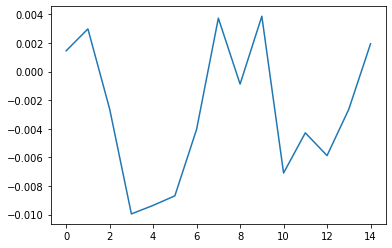

In [ ]:
plt.plot(r_series)
plt.show()

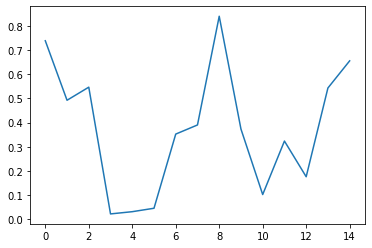

In [ ]:
plt.plot(p_series)
plt.show()

In [ ]:
# Get r data and p data for different dates
r_series = list()
p_series = list()
for i in range(15):
  r, p = scistats.pearsonr(covid_pharmacy_data.dropna()['date_' + str(i)], covid_pharmacy_data.dropna()['casos_novos'])
  r_series.append(r)
  p_series.append(p)
  print(f"For lagged {i} days Pearson r: {r} and p-value: {p}")

For lagged 0 days Pearson r: 0.014712174856054111 and p-value: 0.0006912182289980688
For lagged 1 days Pearson r: 0.012134320445446226 and p-value: 0.005134610816819934
For lagged 2 days Pearson r: 0.002816312184011932 and p-value: 0.5160239848256197
For lagged 3 days Pearson r: -0.004002815819421997 and p-value: 0.35594728232642514
For lagged 4 days Pearson r: -0.0005828936616774742 and p-value: 0.8930670567252584
For lagged 5 days Pearson r: 0.003513447339445362 and p-value: 0.41779199615495005
For lagged 6 days Pearson r: 0.008459212931173035 and p-value: 0.05107365940657503
For lagged 7 days Pearson r: 0.0167174782667223 and p-value: 0.00011545618117063564
For lagged 8 days Pearson r: 0.007096621978012321 and p-value: 0.10171167205083745
For lagged 9 days Pearson r: 0.010626692105658529 and p-value: 0.014255936296228268
For lagged 10 days Pearson r: 0.0011467805784956334 and p-value: 0.7914212907760917
For lagged 11 days Pearson r: 0.006067155508769975 and p-value: 0.16175515670369

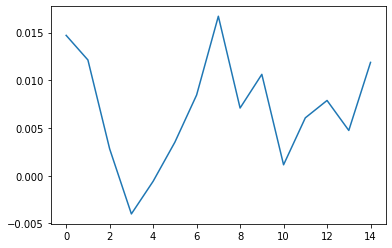

In [ ]:
plt.plot(r_series)
plt.show()

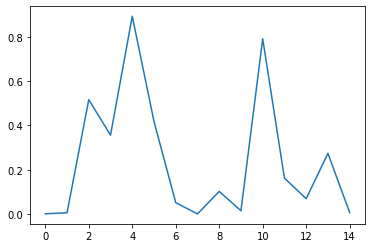

In [ ]:
plt.plot(p_series)
plt.show()

## Parks

In [ ]:
# Get columns that will be used to merge and the mobility to grocery and pharmacy data
mobility_parks = mobility_sao_paulo_ibge_data[['Código Município Completo', 'date', 'parks_percent_change_from_baseline']]
mobility_parks_index = mobility_parks.set_index(['Código Município Completo', 'date'])

# Merge covid-19 data and retail data using shifting to compare with previous dates
covid_park_data = pd.merge(covid_sao_paulo_data, mobility_parks_index, how='inner', left_on=['datahora', 'codigo_ibge'], right_on=['date', 'Código Município Completo'])
covid_park_data = covid_park_data.rename(columns={'parks_percent_change_from_baseline': 'date_0'})
for i in range(1,30):
  mobility_park_shift = mobility_parks_index.shift(-1 * i)
  mobility_park_shift = mobility_park_shift.rename(columns={'parks_percent_change_from_baseline': 'date_' + str(i)})
  covid_park_data = pd.merge(covid_park_data, mobility_park_shift, how='inner', left_on=['datahora', 'codigo_ibge'], right_on=['date', 'Código Município Completo'])

In [ ]:
# Get r data and p data for different dates
r_series = list()
p_series = list()
for i in range(15):
  r, p = scistats.pearsonr(covid_park_data.dropna()['date_' + str(i)], covid_park_data.dropna()['obitos_novos'])
  r_series.append(r)
  p_series.append(p)
  print(f"For lagged {i} days Pearson r: {r} and p-value: {p}")

For lagged 0 days Pearson r: -0.0176928053452742 and p-value: 0.0009465496550224266
For lagged 1 days Pearson r: -0.011935561965573022 and p-value: 0.025740942474316474
For lagged 2 days Pearson r: -0.013368633078802102 and p-value: 0.012493760190141574
For lagged 3 days Pearson r: -0.018565939109619373 and p-value: 0.0005221564935211892
For lagged 4 days Pearson r: -0.021573654547848792 and p-value: 5.548071707987057e-05
For lagged 5 days Pearson r: -0.01651480308065565 and p-value: 0.0020300127180575334
For lagged 6 days Pearson r: -0.014465674538609901 and p-value: 0.006874124905649112
For lagged 7 days Pearson r: -0.013509466658654323 and p-value: 0.011596221757954295
For lagged 8 days Pearson r: -0.010958740491689418 and p-value: 0.040601911640644923
For lagged 9 days Pearson r: -0.009701119138707665 and p-value: 0.06989632405882724
For lagged 10 days Pearson r: -0.01460954029214815 and p-value: 0.006337941567504879
For lagged 11 days Pearson r: -0.014530969286789434 and p-value: 

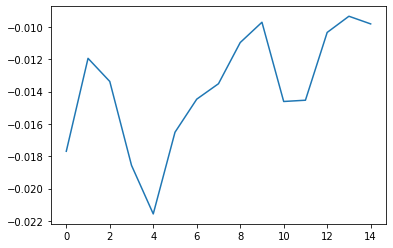

In [ ]:
plt.plot(r_series)
plt.show()

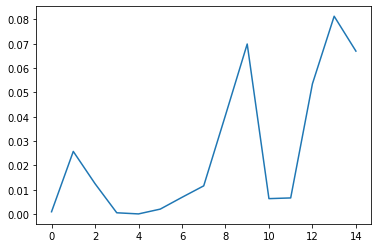

In [ ]:
plt.plot(p_series)
plt.show()

In [ ]:
# Get r data and p data for different dates
r_series = list()
p_series = list()
for i in range(15):
  r, p = scistats.pearsonr(covid_park_data.dropna()['date_' + str(i)], covid_park_data.dropna()['casos_novos'])
  r_series.append(r)
  p_series.append(p)
  print(f"For lagged {i} days Pearson r: {r} and p-value: {p}")

For lagged 0 days Pearson r: -0.0061395070480729855 and p-value: 0.25133821019316294
For lagged 1 days Pearson r: -0.0014384572243044988 and p-value: 0.7881152633817433
For lagged 2 days Pearson r: -0.006396498140495709 and p-value: 0.23203928891483058
For lagged 3 days Pearson r: -0.010025947431197032 and p-value: 0.061030185639378474
For lagged 4 days Pearson r: -0.012813576389956335 and p-value: 0.01665832654471573
For lagged 5 days Pearson r: -0.007855091000550355 and p-value: 0.14219838657818126
For lagged 6 days Pearson r: -0.00603903791986076 and p-value: 0.25917928956730185
For lagged 7 days Pearson r: -0.00572952462138871 and p-value: 0.2843931151479838
For lagged 8 days Pearson r: -0.006293689797270528 and p-value: 0.2396296037745021
For lagged 9 days Pearson r: -0.005343937178123572 and p-value: 0.3180570562221031
For lagged 10 days Pearson r: -0.008234920583093441 and p-value: 0.1238962286558803
For lagged 11 days Pearson r: -0.0062020082809728025 and p-value: 0.24654465213

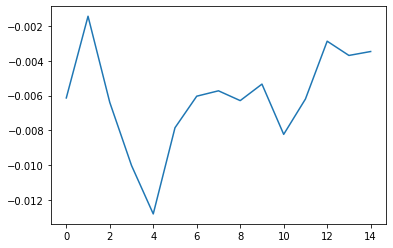

In [ ]:
plt.plot(r_series)
plt.show()

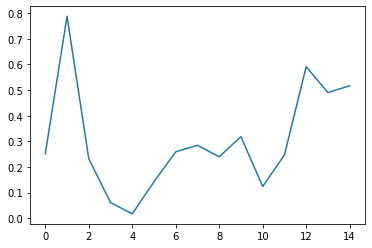

In [ ]:
plt.plot(p_series)
plt.show()

## Transit Stations

In [ ]:
# Get columns that will be used to merge and the mobility to grocery and pharmacy data
mobility_transit = mobility_sao_paulo_ibge_data[['Código Município Completo', 'date', 'transit_stations_percent_change_from_baseline']]
mobility_transit_index = mobility_transit.set_index(['Código Município Completo', 'date'])

# Merge covid-19 data and retail data using shifting to compare with previous dates
covid_transit_data = pd.merge(covid_sao_paulo_data, mobility_transit_index, how='inner', left_on=['datahora', 'codigo_ibge'], right_on=['date', 'Código Município Completo'])
covid_transit_data = covid_transit_data.rename(columns={'transit_stations_percent_change_from_baseline': 'date_0'})
for i in range(1,30):
  mobility_transit_shift = mobility_transit_index.shift(-1 * i)
  mobility_transit_shift = mobility_transit_shift.rename(columns={'transit_stations_percent_change_from_baseline': 'date_' + str(i)})
  covid_transit_data = pd.merge(covid_transit_data, mobility_transit_shift, how='inner', left_on=['datahora', 'codigo_ibge'], right_on=['date', 'Código Município Completo'])

In [ ]:
# Get r data and p data for different dates
r_series = list()
p_series = list()
for i in range(15):
  r, p = scistats.pearsonr(covid_transit_data.dropna()['date_' + str(i)], covid_transit_data.dropna()['obitos_novos'])
  r_series.append(r)
  p_series.append(p)
  print(f"For lagged {i} days Pearson r: {r} and p-value: {p}")

For lagged 0 days Pearson r: -0.02553225215647187 and p-value: 2.4841418889950413e-07
For lagged 1 days Pearson r: -0.025728782204415213 and p-value: 2.0077802814646917e-07
For lagged 2 days Pearson r: -0.02943220754655254 and p-value: 2.727457137503953e-09
For lagged 3 days Pearson r: -0.03100155492620098 and p-value: 3.740909189398415e-10
For lagged 4 days Pearson r: -0.02774128551722497 and p-value: 2.0777215214003136e-08
For lagged 5 days Pearson r: -0.0269680757690232 and p-value: 5.062260103055148e-08
For lagged 6 days Pearson r: -0.024658008994926567 and p-value: 6.286734684889468e-07
For lagged 7 days Pearson r: -0.021972126257963756 and p-value: 9.022357969749408e-06
For lagged 8 days Pearson r: -0.02436400980743172 and p-value: 8.532630538361305e-07
For lagged 9 days Pearson r: -0.020852877883279795 and p-value: 2.5180233076471883e-05
For lagged 10 days Pearson r: -0.023353906622490143 and p-value: 2.3744526239147453e-06
For lagged 11 days Pearson r: -0.021952099945495258 and

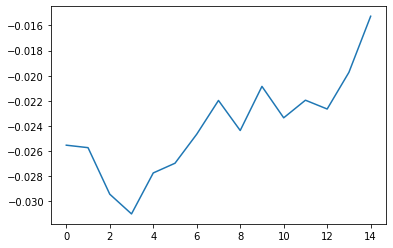

In [ ]:
plt.plot(r_series)
plt.show()

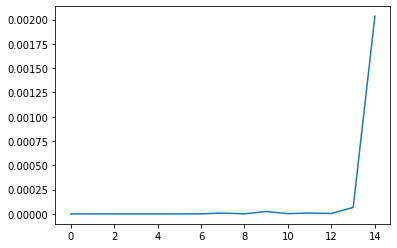

In [ ]:
plt.plot(p_series)
plt.show()

In [ ]:
# Get r data and p data for different dates
r_series = list()
p_series = list()
for i in range(15):
  r, p = scistats.pearsonr(covid_transit_data.dropna()['date_' + str(i)], covid_transit_data.dropna()['casos_novos'])
  r_series.append(r)
  p_series.append(p)
  print(f"For lagged {i} days Pearson r: {r} and p-value: {p}")

For lagged 0 days Pearson r: -0.012305470748750581 and p-value: 0.012916687688151051
For lagged 1 days Pearson r: -0.013815064092462172 and p-value: 0.005253463275125587
For lagged 2 days Pearson r: -0.016574175160398164 and p-value: 0.0008123208498293557
For lagged 3 days Pearson r: -0.016976316047915094 and p-value: 0.0006039814773251046
For lagged 4 days Pearson r: -0.01399904598503421 and p-value: 0.0046804647277617385
For lagged 5 days Pearson r: -0.013093352758007815 and p-value: 0.008163152294023585
For lagged 6 days Pearson r: -0.011562179703862814 and p-value: 0.019497412047442497
For lagged 7 days Pearson r: -0.009602693261832912 and p-value: 0.05238080929687006
For lagged 8 days Pearson r: -0.014407714611916547 and p-value: 0.003604902332699626
For lagged 9 days Pearson r: -0.012490642935516525 and p-value: 0.011620261560148998
For lagged 10 days Pearson r: -0.012858541377217852 and p-value: 0.009382222982282152
For lagged 11 days Pearson r: -0.009715260003601265 and p-value

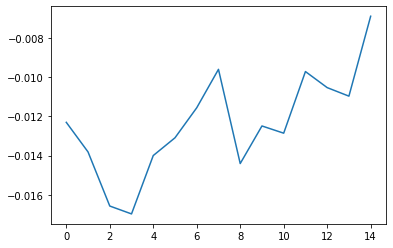

In [ ]:
plt.plot(r_series)
plt.show()

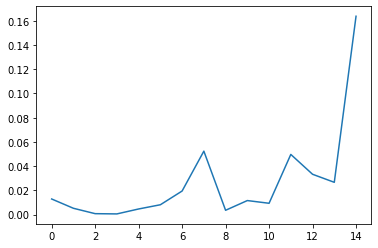

In [ ]:
plt.plot(p_series)
plt.show()

## Workplaces

In [ ]:
# Get columns that will be used to merge and the mobility to grocery and pharmacy data
mobility_work = mobility_sao_paulo_ibge_data[['Código Município Completo', 'date', 'workplaces_percent_change_from_baseline']]
mobility_work_index = mobility_work.set_index(['Código Município Completo', 'date'])

# Merge covid-19 data and retail data using shifting to compare with previous dates
covid_work_data = pd.merge(covid_sao_paulo_data, mobility_work_index, how='inner', left_on=['datahora', 'codigo_ibge'], right_on=['date', 'Código Município Completo'])
covid_work_data = covid_work_data.rename(columns={'workplaces_percent_change_from_baseline': 'date_0'})
for i in range(1,30):
  mobility_work_shift = mobility_work_index.shift(-1 * i)
  mobility_work_shift = mobility_work_shift.rename(columns={'workplaces_percent_change_from_baseline': 'date_' + str(i)})
  covid_work_data = pd.merge(covid_work_data, mobility_work_shift, how='inner', left_on=['datahora', 'codigo_ibge'], right_on=['date', 'Código Município Completo'])

In [ ]:
# Get r data and p data for different dates
r_series = list()
p_series = list()
for i in range(15):
  r, p = scistats.pearsonr(covid_work_data.dropna()['date_' + str(i)], covid_work_data.dropna()['obitos_novos'])
  r_series.append(r)
  p_series.append(p)
  print(f"For lagged {i} days Pearson r: {r} and p-value: {p}")

For lagged 0 days Pearson r: -0.0734618304694046 and p-value: 1.0338741783714493e-139
For lagged 1 days Pearson r: -0.06574444193290635 and p-value: 3.099767027615069e-112
For lagged 2 days Pearson r: -0.0650010839002928 and p-value: 9.467237494380812e-110
For lagged 3 days Pearson r: -0.06383038126473026 and p-value: 6.7936147686954045e-106
For lagged 4 days Pearson r: -0.05336209888664714 and p-value: 1.5410697259081942e-74
For lagged 5 days Pearson r: -0.060456144170074694 and p-value: 3.56561787874849e-95
For lagged 6 days Pearson r: -0.0807753305561396 and p-value: 1.3850715956316056e-168
For lagged 7 days Pearson r: -0.07410389660049846 and p-value: 3.892575158287345e-142
For lagged 8 days Pearson r: -0.06353218545822603 and p-value: 6.353417121698383e-105
For lagged 9 days Pearson r: -0.05558830679449395 and p-value: 9.757121207136428e-81
For lagged 10 days Pearson r: -0.05499842048618565 and p-value: 4.533534874237143e-79
For lagged 11 days Pearson r: -0.04710926643974595 and p

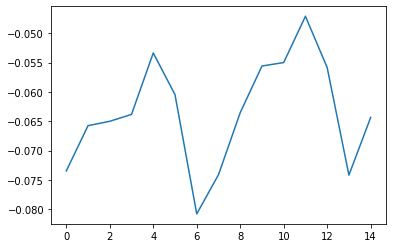

In [ ]:
plt.plot(r_series)
plt.show()

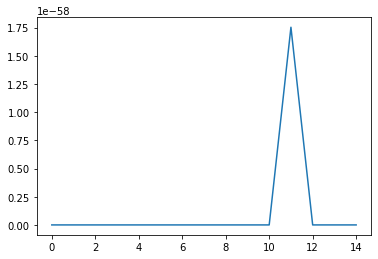

In [ ]:
plt.plot(p_series)
plt.show()

In [ ]:
# Get r data and p data for different dates
r_series = list()
p_series = list()
for i in range(15):
  r, p = scistats.pearsonr(covid_work_data.dropna()['date_' + str(i)], covid_work_data.dropna()['casos_novos'])
  r_series.append(r)
  p_series.append(p)
  print(f"For lagged {i} days Pearson r: {r} and p-value: {p}")

For lagged 0 days Pearson r: -0.06497790833528556 and p-value: 1.1304157154627313e-109
For lagged 1 days Pearson r: -0.05903751082208235 and p-value: 7.671071569526947e-91
For lagged 2 days Pearson r: -0.05640221468550444 and p-value: 4.5694372468839775e-83
For lagged 3 days Pearson r: -0.05565298731779411 and p-value: 6.389122898630145e-81
For lagged 4 days Pearson r: -0.04895269783047719 and p-value: 5.220362208346392e-63
For lagged 5 days Pearson r: -0.057992774714602055 and p-value: 1.0226265678289277e-87
For lagged 6 days Pearson r: -0.07105605168511384 and p-value: 8.107756287594254e-131
For lagged 7 days Pearson r: -0.06433487637976688 and p-value: 1.5104370453978614e-107
For lagged 8 days Pearson r: -0.0573979572975027 and p-value: 5.806014989413171e-86
For lagged 9 days Pearson r: -0.052851510797001615 and p-value: 3.7476244305159954e-73
For lagged 10 days Pearson r: -0.05157789147745097 and p-value: 9.393116057309521e-70
For lagged 11 days Pearson r: -0.04562490568821889 and 

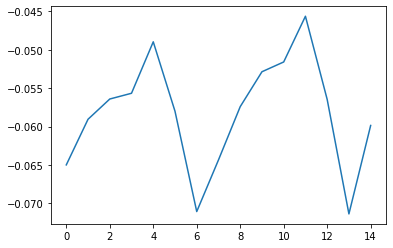

In [ ]:
plt.plot(r_series)
plt.show()

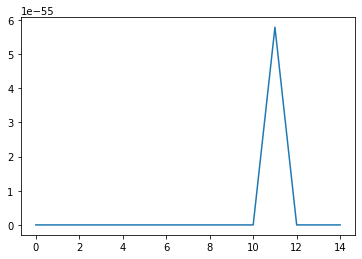

In [ ]:
plt.plot(p_series)
plt.show()

## Residência

In [ ]:
# Get columns that will be used to merge and the mobility data
mobility_residential = mobility_sao_paulo_ibge_data[['Código Município Completo', 'date', 'residential_percent_change_from_baseline']]
mobility_residential_index = mobility_residential.set_index(['Código Município Completo', 'date'])

# Merge covid-19 data and retail data using shifting to compare with previous dates
covid_residential_data = pd.merge(covid_sao_paulo_data, mobility_residential_index, how='inner', left_on=['datahora', 'codigo_ibge'], right_on=['date', 'Código Município Completo'])
covid_residential_data = covid_residential_data.rename(columns={'residential_percent_change_from_baseline': 'date_0'})
for i in range(1,30):
  mobility_residential_shift = mobility_residential_index.shift(-1 * i)
  mobility_residential_shift = mobility_residential_shift.rename(columns={'residential_percent_change_from_baseline': 'date_' + str(i)})
  covid_residential_data = pd.merge(covid_residential_data, mobility_residential_shift, how='inner', left_on=['datahora', 'codigo_ibge'], right_on=['date', 'Código Município Completo'])

In [ ]:
# Get r data and p data for different dates
r_series = list()
p_series = list()
for i in range(15):
  r, p = scistats.pearsonr(covid_residential_data.dropna()['date_' + str(i)], covid_residential_data.dropna()['obitos_novos'])
  r_series.append(r)
  p_series.append(p)
  print(f"For lagged {i} days Pearson r: {r} and p-value: {p}")

For lagged 0 days Pearson r: 0.09931007111713062 and p-value: 3.047780298128846e-100
For lagged 1 days Pearson r: 0.08487174984112805 and p-value: 1.248663234456689e-73
For lagged 2 days Pearson r: 0.08845763557184427 and p-value: 7.600047981740433e-80
For lagged 3 days Pearson r: 0.08780736243617088 and p-value: 1.0647481779016353e-78
For lagged 4 days Pearson r: 0.07255706714134502 and p-value: 2.958090783105128e-54
For lagged 5 days Pearson r: 0.08027038115655905 and p-value: 4.925726806529334e-66
For lagged 6 days Pearson r: 0.10564230268410389 and p-value: 2.99782932308576e-113
For lagged 7 days Pearson r: 0.09833142072991169 and p-value: 2.6386584660919168e-98
For lagged 8 days Pearson r: 0.08659543244951914 and p-value: 1.383833613842795e-76
For lagged 9 days Pearson r: 0.07750081695450398 and p-value: 1.1458806540018516e-61
For lagged 10 days Pearson r: 0.07724455640348568 and p-value: 2.8535540671224633e-61
For lagged 11 days Pearson r: 0.06578695570954783 and p-value: 6.71640

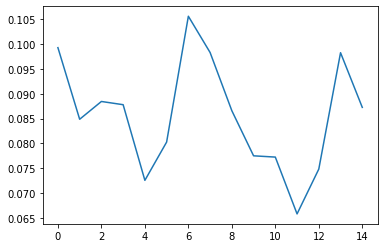

In [ ]:
plt.plot(r_series)
plt.show()

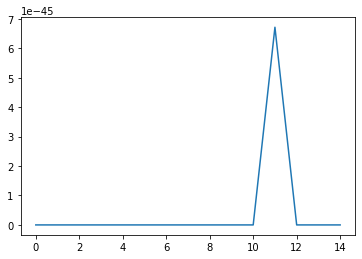

In [ ]:
plt.plot(p_series)
plt.show()

In [ ]:
# Get r data and p data for different dates
r_series = list()
p_series = list()
for i in range(15):
  r, p = scistats.pearsonr(covid_residential_data.dropna()['date_' + str(i)], covid_residential_data.dropna()['casos_novos'])
  r_series.append(r)
  p_series.append(p)
  print(f"For lagged {i} days Pearson r: {r} and p-value: {p}")

For lagged 0 days Pearson r: 0.06971012631089045 and p-value: 3.289018561186477e-50
For lagged 1 days Pearson r: 0.05813080479103014 and p-value: 2.0226527031777263e-35
For lagged 2 days Pearson r: 0.06081289766484159 and p-value: 1.3125896276345321e-38
For lagged 3 days Pearson r: 0.0601002320789399 and p-value: 9.530647810805837e-38
For lagged 4 days Pearson r: 0.051248529694300826 and p-value: 6.797226635577541e-28
For lagged 5 days Pearson r: 0.06346029194278713 and p-value: 6.779303056288434e-42
For lagged 6 days Pearson r: 0.0781658254708706 and p-value: 1.0585408473273426e-62
For lagged 7 days Pearson r: 0.0699613610546696 and p-value: 1.4673615575177482e-50
For lagged 8 days Pearson r: 0.06301214706354528 and p-value: 2.49693418871259e-41
For lagged 9 days Pearson r: 0.05885578432635996 and p-value: 2.873132874119967e-36
For lagged 10 days Pearson r: 0.05586850465807224 and p-value: 7.649341411198699e-33
For lagged 11 days Pearson r: 0.047650284979507684 and p-value: 2.47690411

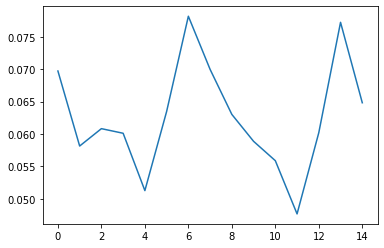

In [ ]:
plt.plot(r_series)
plt.show()

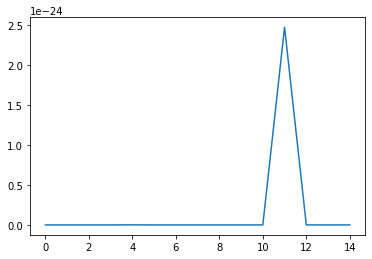

In [ ]:
plt.plot(p_series)
plt.show()

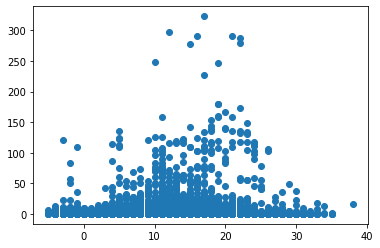

In [ ]:
covid_residential_data = covid_residential_data.dropna()

plt.plot(covid_residential_data['date_0'], covid_residential_data['obitos_novos'], 'o')
plt.show()